In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analisis general del dataset

In [2]:
# Abro el dataframe con pandas
df = pd.read_csv("./AbandonoDeClientes.csv")

# Muestro 5 filas al azar
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5053,5054,15674433,Allan,636,Germany,Female,28,2,115265.14,1,0,0,191627.85,0
39,40,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,0,1,178074.04,0
7222,7223,15694237,McEwan,744,Spain,Male,39,4,95161.75,1,1,0,19409.77,0
6856,6857,15670889,Nwachukwu,528,France,Male,34,1,125566.90,1,1,1,176763.27,0
221,222,15787155,Yang,514,Spain,Male,30,7,0.00,1,0,1,125010.24,0


        El dataframe cuenta con 14 columnas. Las que más nos interesan son "Balance", en donde se muestra el dinero total con el que cuenta la persona; "EstimatedSalary", una estimación del salario de la persona; "CreditScore", el puntaje de crédito en donde se califica el comportamiento crediticio de la persona; "IsActiveMember", en donde se muestra si la persona es activa en el uso de la cuenta bancaria (0 = No, 1 = Sí); Tenure, en donde se muestra las colocaciones que se realizan en una cuenta bancaria, como una cuenta corriente o caja de ahorro; y, finalmente, "Exited", en donde se muestra si la persona abandonó el banco en cuestión (0 = No, 1 = Sí)

In [9]:
# Muestro información sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


        Podemos ver que el dataframe no cuenta con 10000 filas y no tiene valores nulos

In [ ]:
# Muestro una descripción sobre las columnas del dataframe
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


        Credit Score: Podemos ver que el promedio del puntaje crediticio es de 650 aunque hay una gran dispersión en estos, el más alto es de 850.

        Tenure: Hay muy poca disperión en la tenencia, siendo el promedio 5,01.

        HasCrCard: El 70% tiene tarjeta de credito.

        IsActiveMember: El 51% es un miembro activo del banco.

        Exited: El 20% ha abandonado el banco.

In [ ]:
# Muestro los valores nulos del dataframe
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

        Confirmamos que no hay valores nulos

In [ ]:
# Muestro los valores duplicados del dataframe
df.duplicated().sum()

0

        Comprobamos que no hay valores repetidos en el dataframe

### Analisis en profundidad

##### Por edad

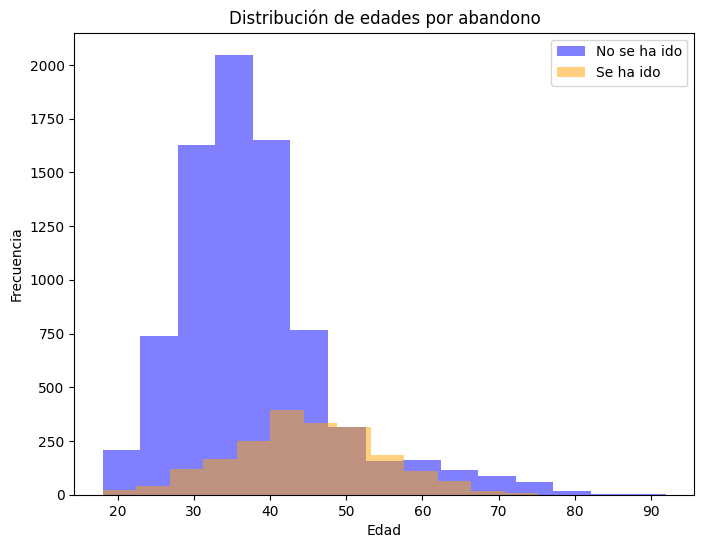

In [44]:
# Filtro las edades segun la columna Exited
age_exited_0 = df[df['Exited'] == 0]['Age']
age_exited_1 = df[df['Exited'] == 1]['Age']

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(age_exited_0, bins=15, alpha=0.5, label='No se ha ido', color='blue')
plt.hist(age_exited_1, bins=15, alpha=0.5, label='Se ha ido', color='orange')
plt.title("Distribución de edades por abandono")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


        En este gráfico muestro la relación entre la columna exited y la columna edad. Podemos ver que hay gran cantidad de personas entre los 30 y 40 años con gran dispersión en las personas que no se han ido del banco. Mientras que de las que sí se fueron, tenemos una capana más uniforme con su centro en las personas entre los 40 y 50 años

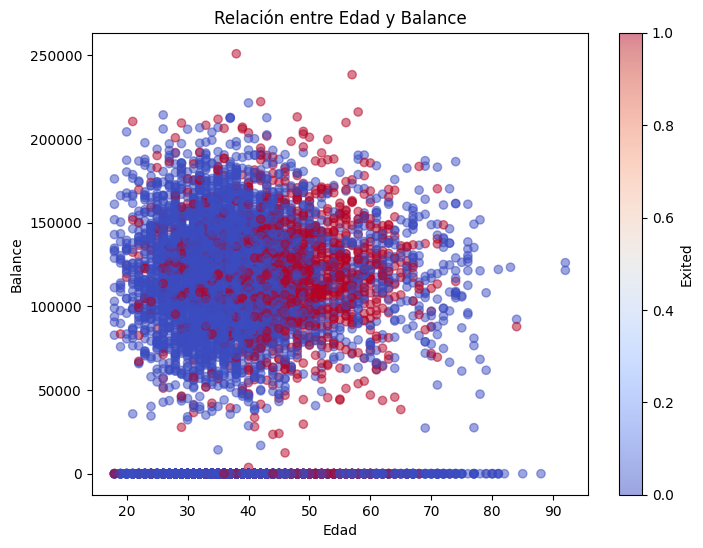

In [ ]:
#Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Balance'], alpha=0.5, c=df['Exited'], cmap='coolwarm', label='Exited')
plt.title('Relación entre Edad y Balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.colorbar(label='Exited')
plt.show()

##### Por país

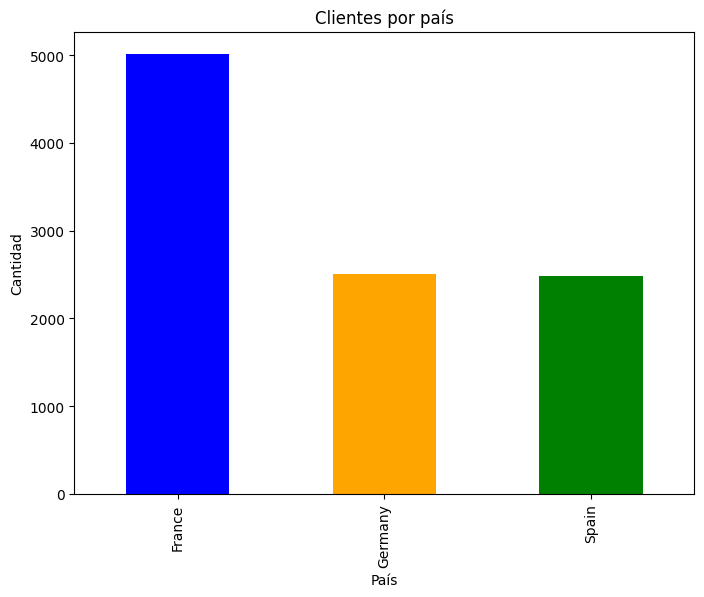

In [24]:
# Barplot
plt.figure(figsize=(8, 6))
df['Geography'].value_counts().plot(kind='bar',color=['blue', 'orange', 'green'])
plt.title('Clientes por país')
plt.xlabel('País',)
plt.ylabel('Cantidad')
plt.show()


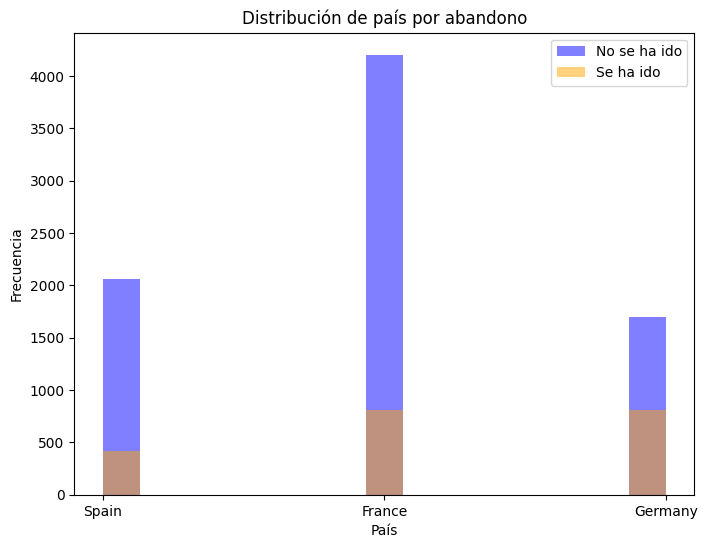

In [34]:
# Filtro los paises segun la columna Exited
country_exited_0 = df[df['Exited'] == 0]['Geography']
country_exited_1 = df[df['Exited'] == 1]['Geography']

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(country_exited_0, bins=15, alpha=0.5, label='No se ha ido', color='blue')
plt.hist(country_exited_1, bins=15, alpha=0.5, label='Se ha ido', color='orange')
plt.title("Distribución de país por abandono")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

##### Varios

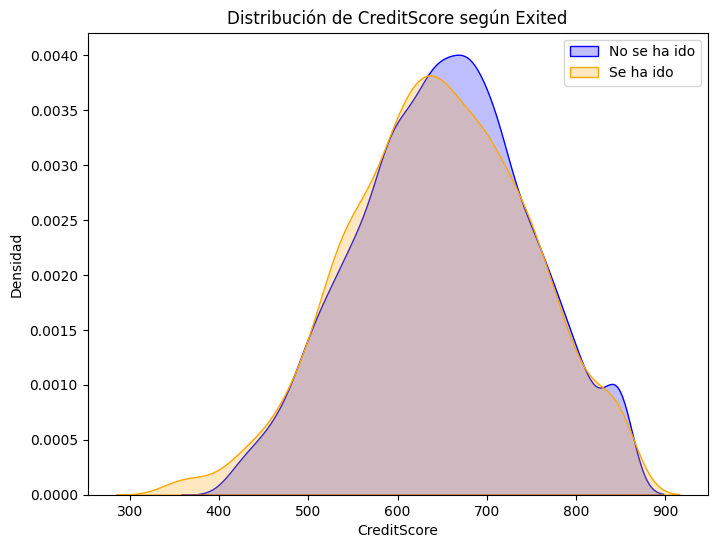

In [ ]:
#kdeplot
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Exited'] == 0]['CreditScore'], label='No se ha ido', fill=True, color='blue')
sns.kdeplot(df[df['Exited'] == 1]['CreditScore'], label='Se ha ido', fill=True, color='orange')
plt.title('Distribución de CreditScore según Exited')
plt.xlabel('CreditScore')
plt.ylabel('Densidad')
plt.legend()
plt.show()



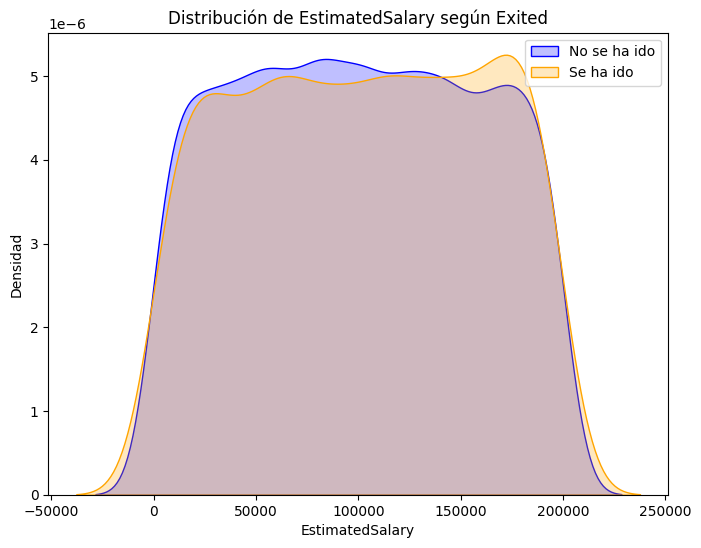

In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Exited'] == 0]['EstimatedSalary'], label='No se ha ido', fill=True, color='blue')
sns.kdeplot(df[df['Exited'] == 1]['EstimatedSalary'], label='Se ha ido', fill=True, color='orange')
plt.title('Distribución de EstimatedSalary según Exited')
plt.xlabel('EstimatedSalary')
plt.ylabel('Densidad')
plt.legend()
plt.show()

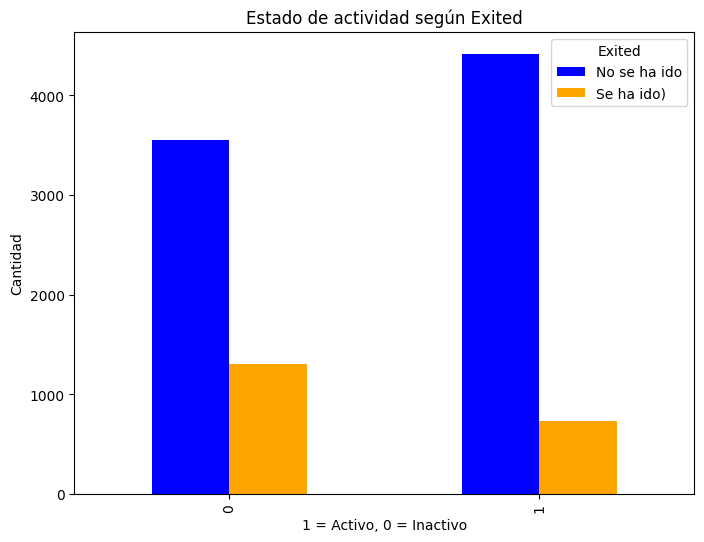

In [48]:
# Agrupo los datos
grouped_data = df.groupby(['IsActiveMember', 'Exited']).size().unstack()

# Gráfico de barras agrupadas
grouped_data.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Estado de actividad según Exited')
plt.xlabel('1 = Activo, 0 = Inactivo')
plt.ylabel('Cantidad')
plt.legend(title='Exited', labels=['No se ha ido', 'Se ha ido)'])
plt.show()